In [54]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.4 (python 3.8.13) on 2024-04-22 08:49.


In [55]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.1 anndata==0.9.2 umap==0.5.2 numpy==1.21.5 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6


In [56]:
import os
os.chdir('D:/KP/EKP_RKP')

In [57]:
import scanpy.external as sce

In [58]:
# EKP

adata_1 = sc.read_10x_mtx('D:/KP/EKP_RKP/EKP/outs/filtered_feature_bc_matrix',
                            var_names='gene_symbols', cache=True)

# RKP
adata_2 = sc.read_10x_mtx('D:/KP/EKP_RKP/RKP/outs/filtered_feature_bc_matrix',
                            var_names='gene_symbols', cache=True)
                          

... reading from cache file cache\D-KP-EKP_RKP-EKP-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache\D-KP-EKP_RKP-RKP-outs-filtered_feature_bc_matrix-matrix.h5ad


In [59]:
ls = [adata_1, adata_2]

In [60]:
for a in ls:
    if a is not None:
        a.var_names_make_unique()
print('done')

done


In [61]:
for a in ls:
    if a is not None:
        sc.pp.filter_cells(a, min_genes=200)
        sc.pp.filter_genes(a, min_cells=3)
print('done')

filtered out 477 cells that have less than 200 genes expressed
filtered out 14619 genes that are detected in less than 3 cells
filtered out 542 cells that have less than 200 genes expressed
filtered out 14577 genes that are detected in less than 3 cells
done


In [62]:
for a in ls:
    if a is not None:
        a.var['mt'] = a.var_names.str.startswith('mt-')
        sc.pp.calculate_qc_metrics(a, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
        sc.pp.normalize_total(a)
        sc.pp.log1p(a)
print('done')

normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
done


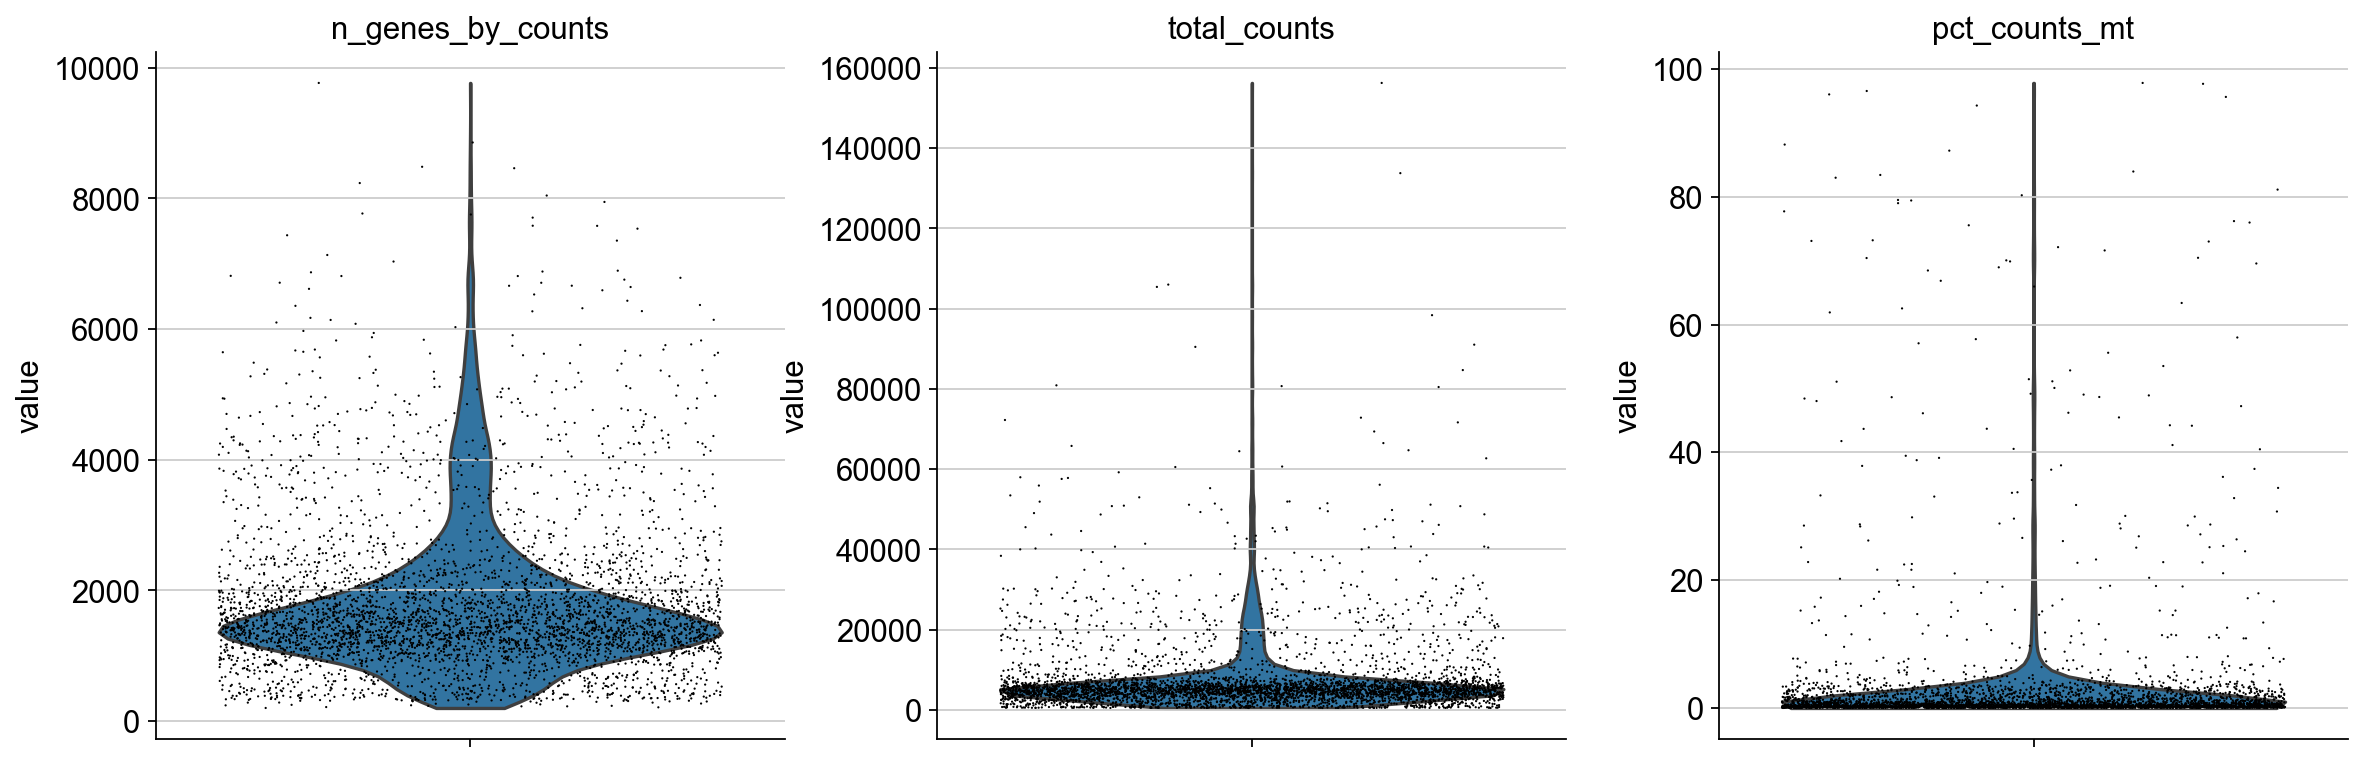

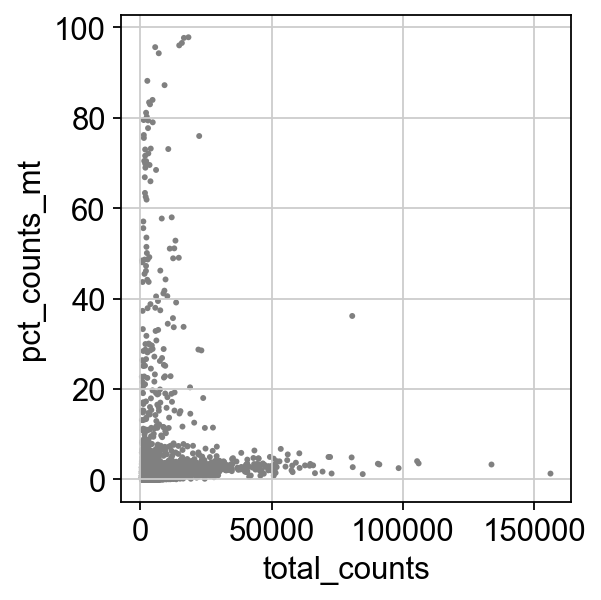

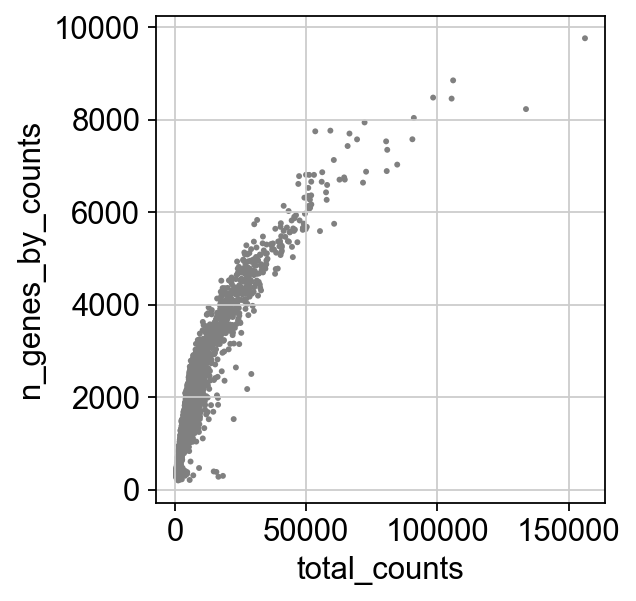

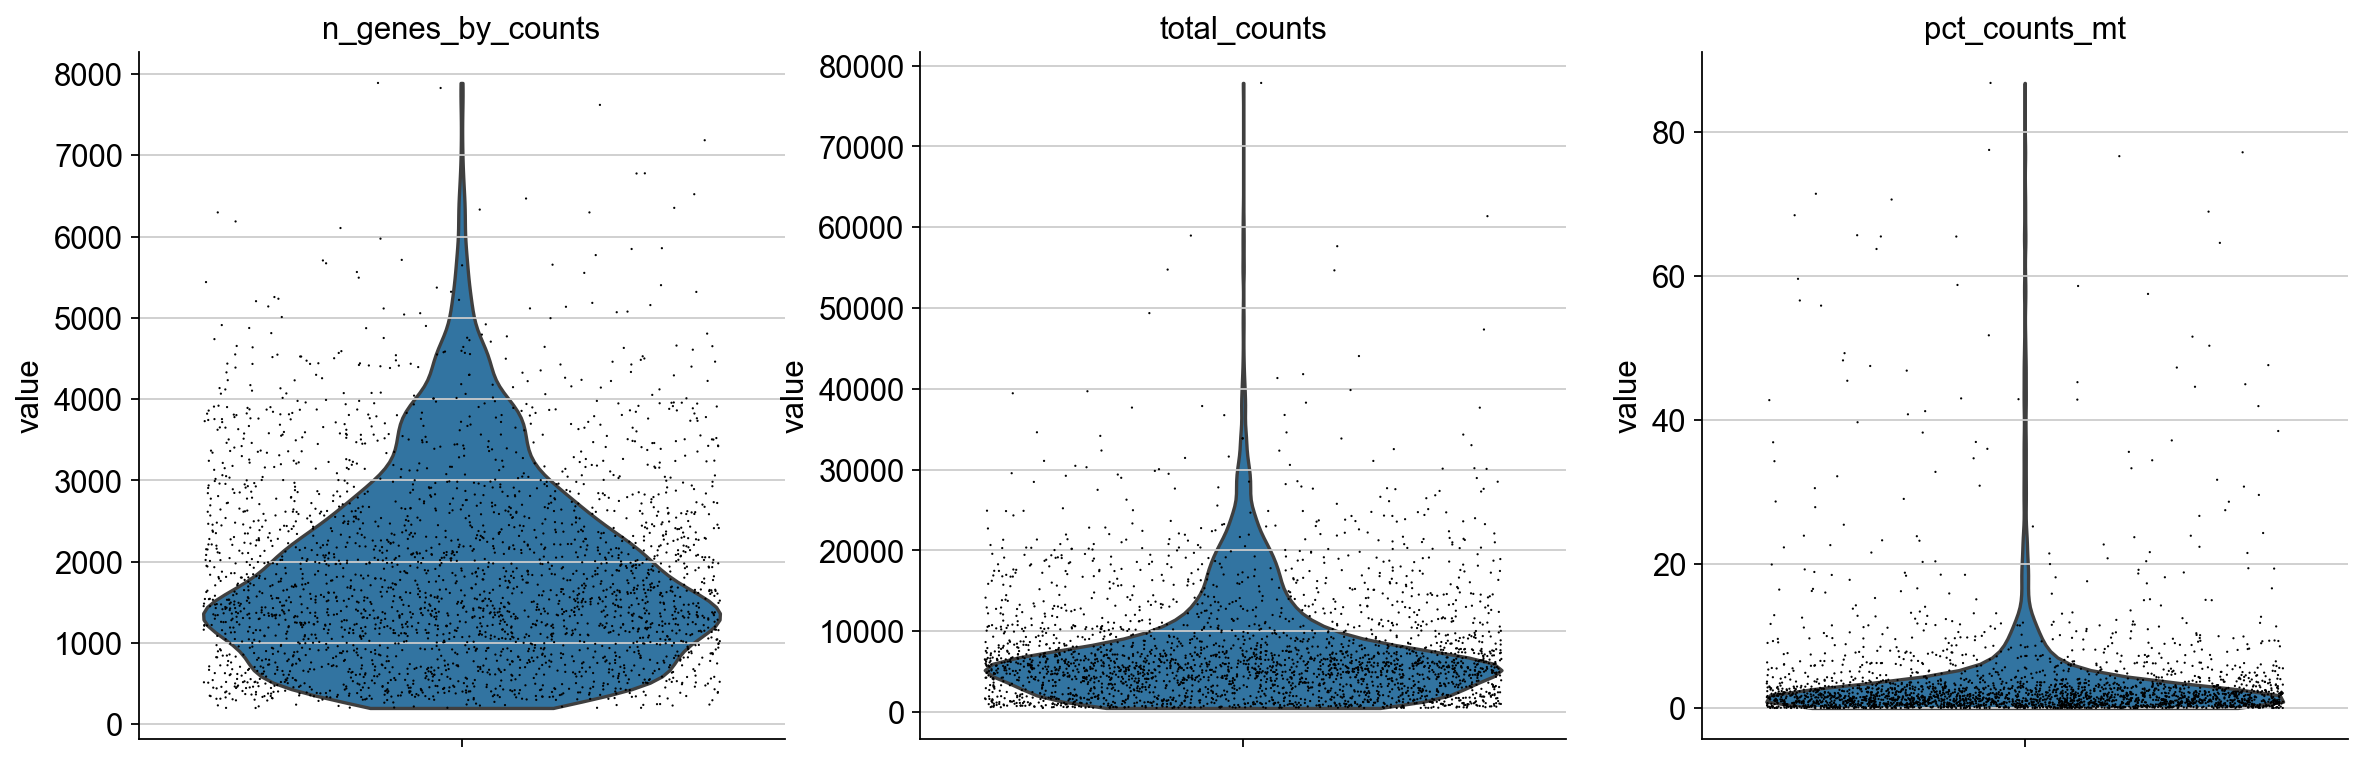

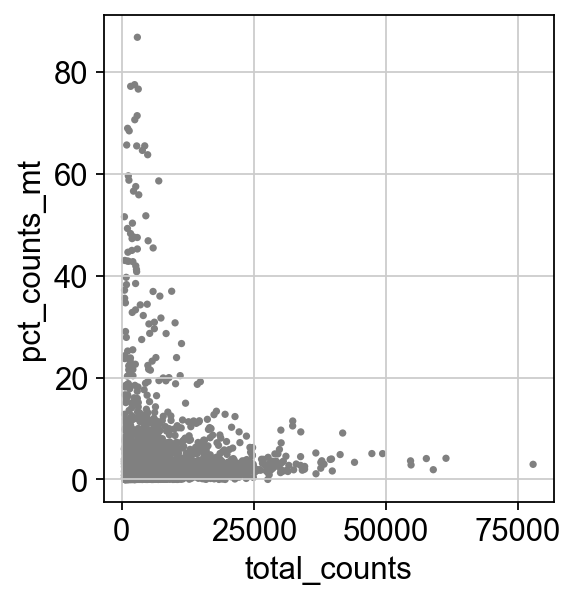

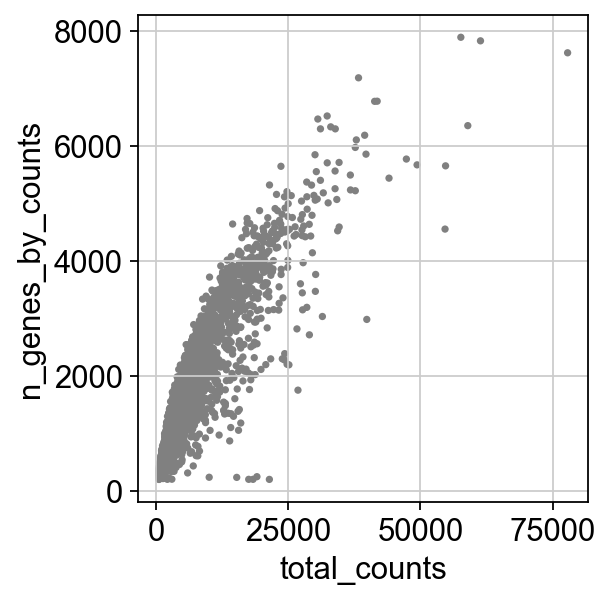

done


In [63]:
for a in ls:
    if a is not None:
        sc.pl.violin(a, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)
        sc.pl.scatter(a, x='total_counts', y='pct_counts_mt')
        sc.pl.scatter(a, x='total_counts', y='n_genes_by_counts')
print('done')

In [64]:
for a in ls:
    if a is not None:
        a = a[a.obs.n_genes_by_counts < 8000, :]
        a = a[a.obs.pct_counts_mt < 20, :]
print('done')

done


In [65]:
for a in ls:
    if a is not None:
        a.obs['tissue'] = 'allograft'
print('done')

done


In [66]:
adata_1.obs['type'] = 'EKP'

adata_2.obs['type'] = 'RKP'


In [67]:
for a in ls:
    a.obs.tissue = a.obs.tissue.astype('category')

In [68]:
for a in ls:
    a.obs.type = a.obs.type.astype('category')

In [69]:
adata_1

AnnData object with n_obs × n_vars = 4217 × 17666
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [70]:
sc.pp.pca(adata_1)
sc.pp.neighbors(adata_1)
sc.tl.umap(adata_1)
sc.tl.pca(adata_1)
sc.tl.leiden(adata_1)

computing PCA
    with n_comps=50
    finished (0:00:05)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)
computing PCA
    with n_comps=50
    finished (0:00:05)
running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


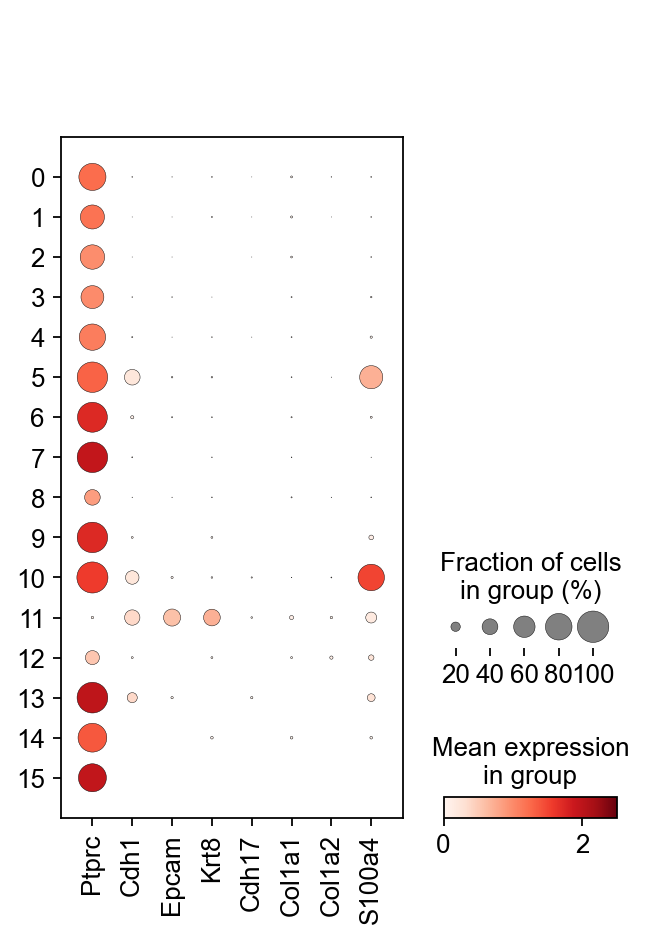

In [71]:
#IGC marker: 'Krt8','Cdh17'
#DGC marker: 'Col1a1','Col1a2','S100a4'
sc.pl.dotplot(adata_1, ['Ptprc','Cdh1','Epcam','Krt8','Cdh17','Col1a1','Col1a2','S100a4'], groupby='leiden', vmax = 2.5)

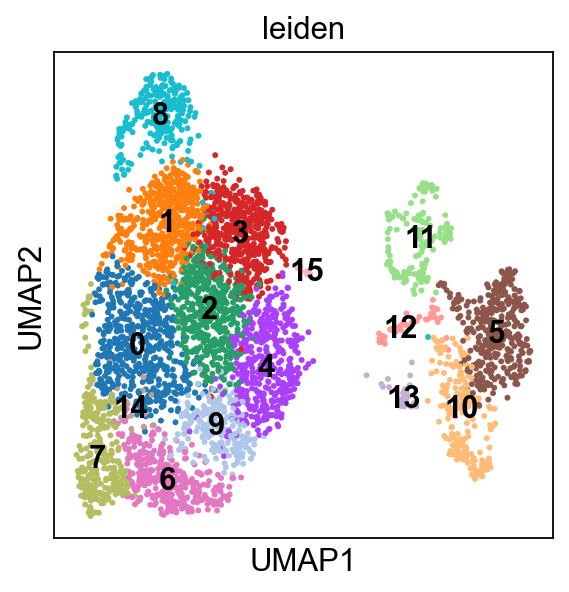

In [72]:
sc.pl.umap(adata_1, color=['leiden'], legend_loc='on data')

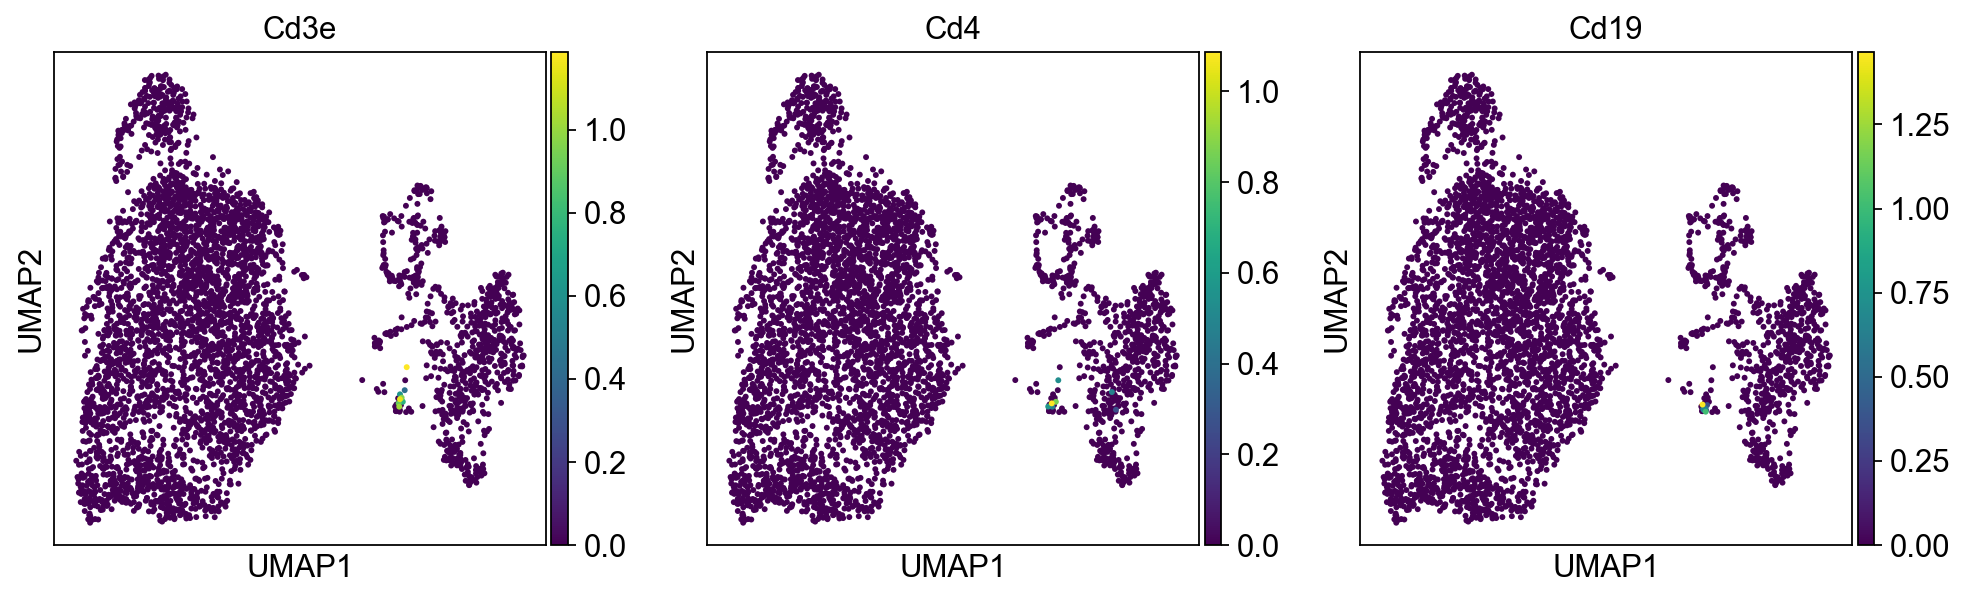

In [73]:
sc.pl.umap(adata_1, color=['Cd3e','Cd4','Cd19'])

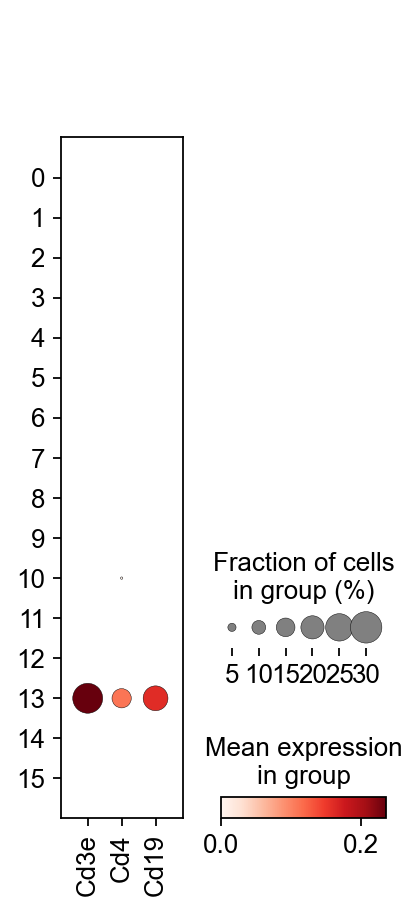

In [74]:
sc.pl.dotplot(adata_1, ['Cd3e','Cd4','Cd19'], groupby='leiden')

In [75]:
df = pd.crosstab(adata_1.obs['leiden'],adata_1.obs['leiden'])
df

leiden,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
leiden,,,,,,,,,,,,,,,,
0,530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,480,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,475,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,455,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,400,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,334,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,313,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,296,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,252,0,0,0,0,0,0,0


In [76]:
adata_1_epi = adata_1[adata_1.obs['leiden'].isin(['5','10','11','12'])]
adata_1_epi

View of AnnData object with n_obs × n_vars = 736 × 17666
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [77]:
adata_1_imn = adata_1[adata_1.obs['leiden'].isin(['0','1','2','3','4','6','7','8','9',
                                                     '13','14','15'])]
adata_1_imn

View of AnnData object with n_obs × n_vars = 3481 × 17666
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [78]:
adata_2

AnnData object with n_obs × n_vars = 2775 × 17708
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

computing PCA
    with n_comps=50
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)
computing PCA
    with n_comps=50
    finished (0:00:03)
running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


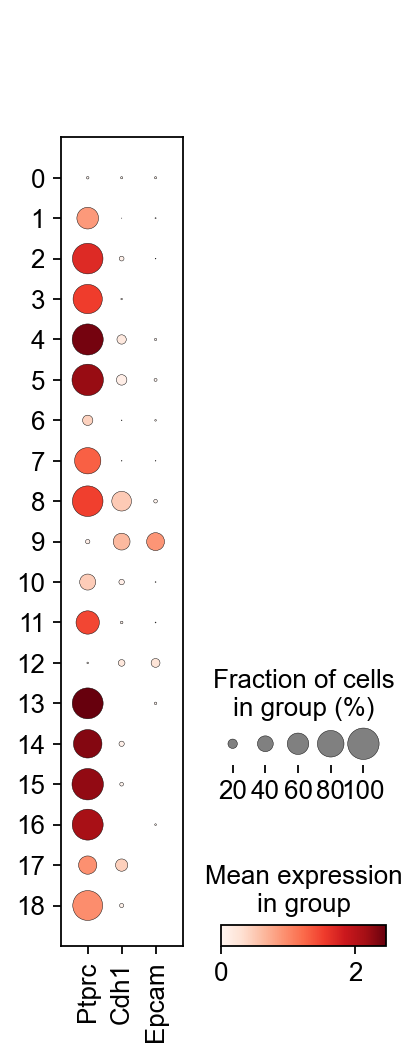

In [79]:
sc.pp.pca(adata_2)
sc.pp.neighbors(adata_2)
sc.tl.umap(adata_2)
sc.tl.pca(adata_2)
sc.tl.leiden(adata_2)
sc.pl.dotplot(adata_2, ['Ptprc','Cdh1','Epcam'], groupby='leiden')

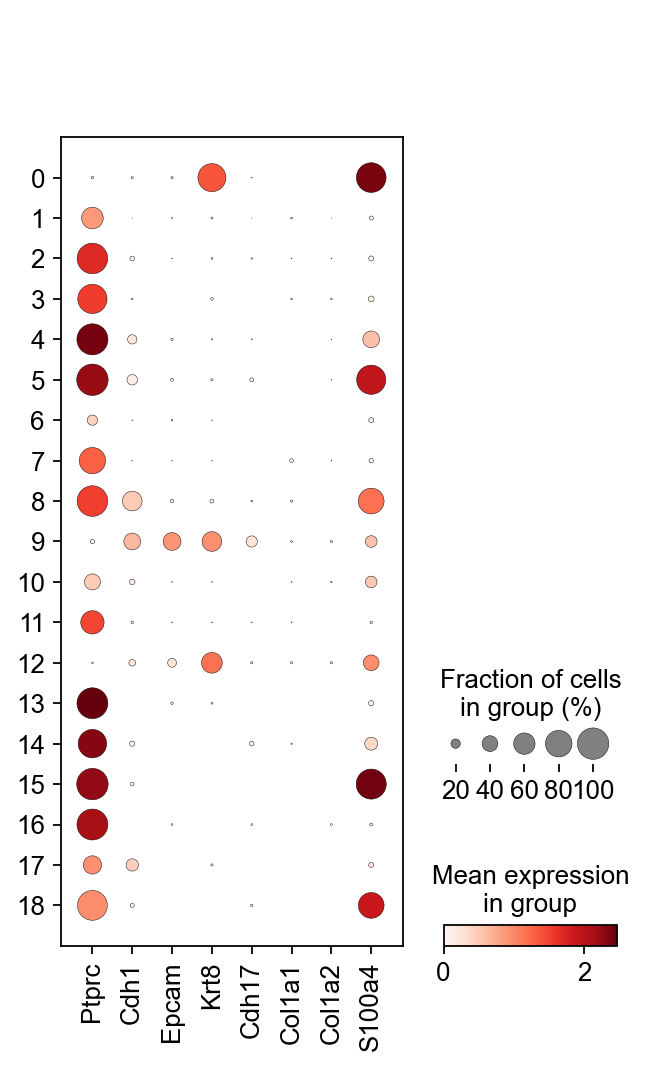

In [80]:
sc.pl.dotplot(adata_2, ['Ptprc','Cdh1','Epcam','Krt8','Cdh17','Col1a1','Col1a2','S100a4'], groupby='leiden')

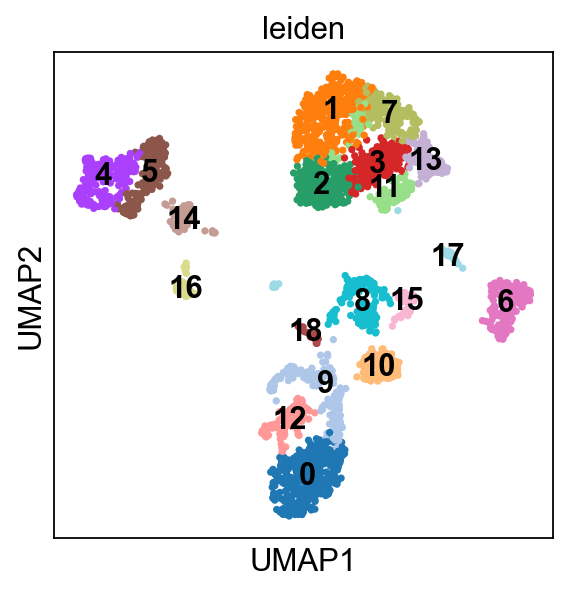

In [81]:
sc.pl.umap(adata_2, color=['leiden'], legend_loc='on data')

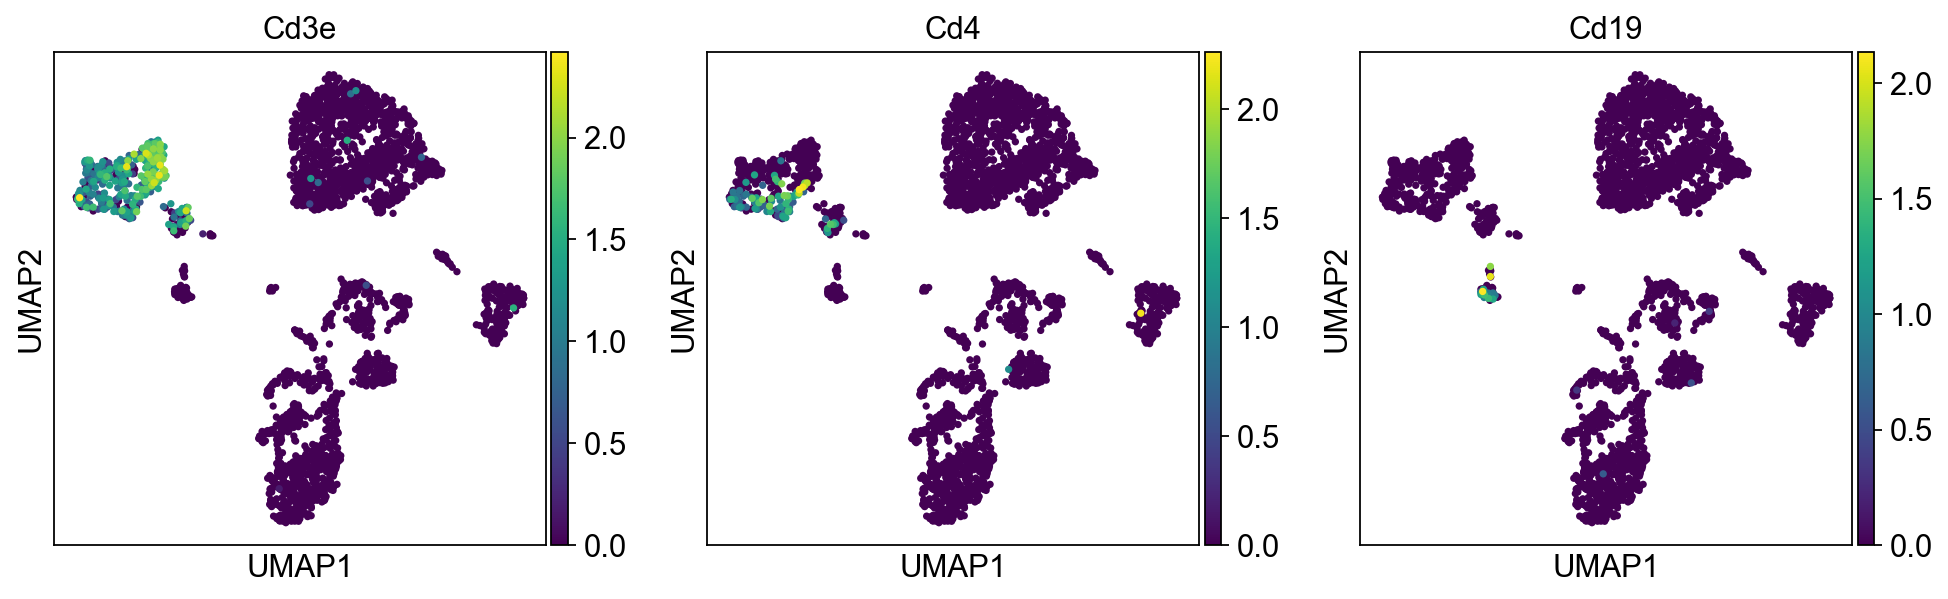

In [82]:
sc.pl.umap(adata_2, color=['Cd3e','Cd4','Cd19'])

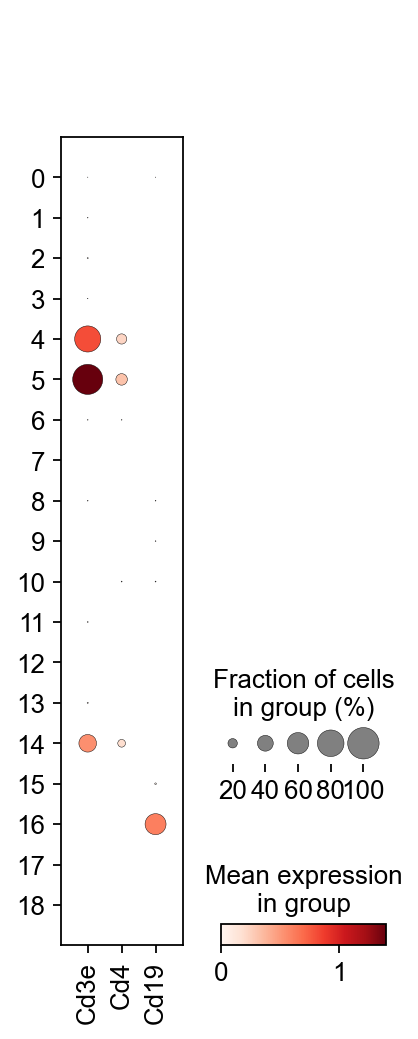

In [83]:
sc.pl.dotplot(adata_2, ['Cd3e','Cd4','Cd19'], groupby='leiden')

In [84]:
df = pd.crosstab(adata_2.obs['leiden'],adata_2.obs['leiden'])
df

leiden,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
leiden,,,,,,,,,,,,,,,,,,,
0,348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,219,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,160,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,155,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,151,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,142,0,0,0,0,0,0,0,0,0,0


In [85]:
adata_2_epi = adata_2[adata_2.obs['leiden'].isin(['0','6','8','9','10',
                                                      '12','15','17','18'])]
adata_2_epi

View of AnnData object with n_obs × n_vars = 1116 × 17708
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [86]:
adata_2_imn = adata_2[adata_2.obs['leiden'].isin(['1','2','3','4','5','7',
                                                      '11','13','14','16'])]
adata_2_imn

View of AnnData object with n_obs × n_vars = 1659 × 17708
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

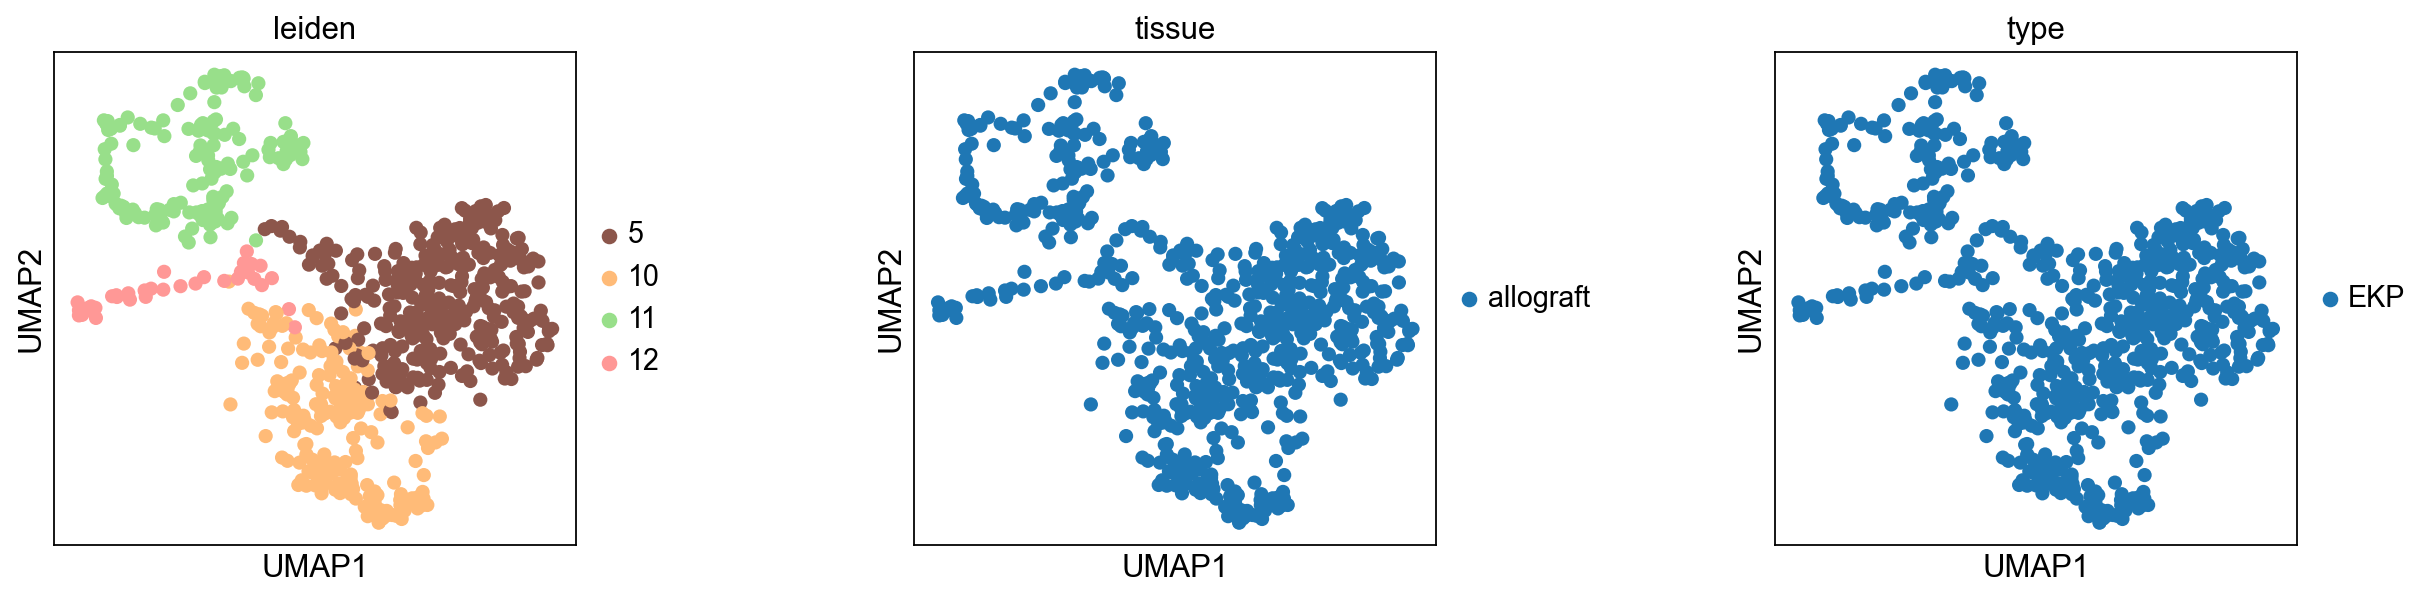

In [87]:
sc.pl.umap(adata_1_epi, color=['leiden', 'tissue','type'], wspace=0.5)

In [88]:
ls = [adata_1_epi, adata_2_epi,
     adata_1_imn, adata_2_imn]

In [89]:
for a in ls:
    if a is not None:
        a.var_names_make_unique()
print('done')

done


In [90]:
for a in ls:
    if a is not None:
        a.var.columns = [f'{col}_2' for col in a.var.columns]
print('done')

done


In [91]:
adata_A = adata_1_epi.concatenate(adata_2_epi,
                               batch_key='batch')



In [92]:
adata_B = adata_1_imn.concatenate(adata_2_imn,
                               batch_key='batch')



In [93]:
adata_A.raw = adata_A

In [94]:
adata_B.raw = adata_B

In [95]:
adata_A.obs['type']

AAACCCACAGTATGAA-1-0    EKP
AAACGAAAGTAGGGTC-1-0    EKP
AAACGAATCTCGCTTG-1-0    EKP
AAACGCTAGTGGCGAT-1-0    EKP
AAACGCTCATGGAATA-1-0    EKP
                       ... 
TTTGATCCATGACTTG-1-1    RKP
TTTGGAGGTCTCGCGA-1-1    RKP
TTTGGAGTCATGGTAC-1-1    RKP
TTTGTTGCAACAGCCC-1-1    RKP
TTTGTTGCAGGATTCT-1-1    RKP
Name: type, Length: 1852, dtype: category
Categories (2, object): ['EKP', 'RKP']

In [96]:
adata_B.obs['type']

AAACCCACAACACACT-1-0    EKP
AAACCCACAGACTCTA-1-0    EKP
AAACGAACACAACGTT-1-0    EKP
AAACGAACAGACGATG-1-0    EKP
AAACGAAGTTTGGGTT-1-0    EKP
                       ... 
TTTGACTAGATCGGTG-1-1    RKP
TTTGACTGTTGTGGAG-1-1    RKP
TTTGATCGTGCGTGCT-1-1    RKP
TTTGGAGTCTATCCAT-1-1    RKP
TTTGTTGGTGAGTTTC-1-1    RKP
Name: type, Length: 5140, dtype: category
Categories (2, object): ['EKP', 'RKP']

In [97]:
adata_A.obs.type = adata_A.obs.type.astype('category')
adata_B.obs.type = adata_B.obs.type.astype('category')

In [98]:
adata_A

AnnData object with n_obs × n_vars = 1852 × 16482
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1'
    obsm: 'X_pca', 'X_umap'

In [99]:
adata_B

AnnData object with n_obs × n_vars = 5140 × 16482
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1'
    obsm: 'X_pca', 'X_umap'

In [100]:
adata_1_epi.write('EKP_epi_pp.h5ad', compression='gzip')
adata_2_epi.write('RKP_epi_pp.h5ad', compression='gzip')


In [101]:
adata_1_imn.write('EKP_imn_pp.h5ad', compression='gzip')
adata_2_imn.write('RKP_imn_pp.h5ad', compression='gzip')


In [102]:
#del adata_A.obs['cell_id']
#del adata_B.obs['cell_id']

In [103]:
adata_A.write('EKP_RKP_epithelial_pp_and_concatenated_04-22-24.h5ad', compression='gzip')

In [104]:
adata_B.write('EKP_RKP_immune_pp_and_concatenated_04-22-24.h5ad', compression='gzip')

In [105]:
# Epithelial cell
adata_A = sc.read('EKP_RKP_epithelial_pp_and_concatenated_04-22-24.h5ad')
adata_A

AnnData object with n_obs × n_vars = 1852 × 16482
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1'
    obsm: 'X_pca', 'X_umap'

In [106]:
# Non-immune cell
adata_B = sc.read('EKP_RKP_immune_pp_and_concatenated_04-22-24.h5ad')
adata_B

AnnData object with n_obs × n_vars = 5140 × 16482
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1'
    obsm: 'X_pca', 'X_umap'

In [114]:
df = pd.crosstab(adata_A.obs['type'],adata_A.obs['type'])
df

type,EKP,RKP
type,,
EKP,736,0
RKP,0,1116


In [107]:
df = pd.crosstab(adata_B.obs['type'],adata_B.obs['type'])
df

type,EKP,RKP
type,,
EKP,3481,0
RKP,0,1659


In [108]:
# EKP epi
adata_1_epi = sc.read('EKP_epi_pp.h5ad')
adata_1_epi

AnnData object with n_obs × n_vars = 736 × 17666
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden'
    var: 'gene_ids_2', 'feature_types_2', 'n_cells_2', 'mt_2', 'n_cells_by_counts_2', 'mean_counts_2', 'pct_dropout_by_counts_2', 'total_counts_2'
    uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [109]:
# RKP epi
adata_2_epi = sc.read('RKP_epi_pp.h5ad')
adata_2_epi

AnnData object with n_obs × n_vars = 1116 × 17708
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden'
    var: 'gene_ids_2', 'feature_types_2', 'n_cells_2', 'mt_2', 'n_cells_by_counts_2', 'mean_counts_2', 'pct_dropout_by_counts_2', 'total_counts_2'
    uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

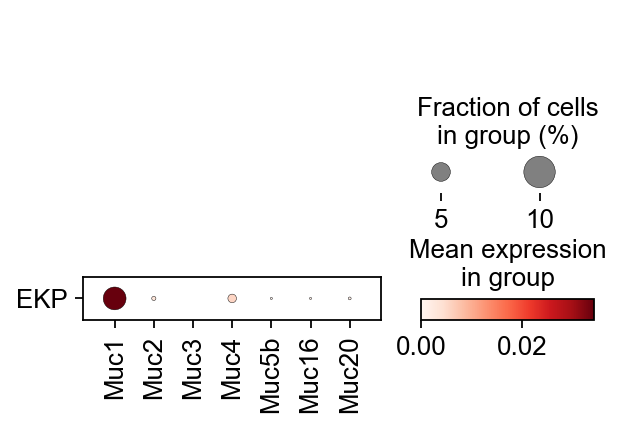

In [110]:
sc.pl.dotplot(adata_1_epi, ['Muc1','Muc2',
                      'Muc3','Muc4',#'Muc5ac',
                            'Muc5b', #'Muc6', 
                            #'Muc7', 
                            #'Muc8',
                            #'Muc10',
                            #'Muc11','Muc12','Muc13','Muc15',
                            'Muc16',#'Muc19',
                      'Muc20',#'Muc21'
                     ], groupby='type', swap_axes=False)#, save='_Cluster_0_markers_by_tissue.pdf')

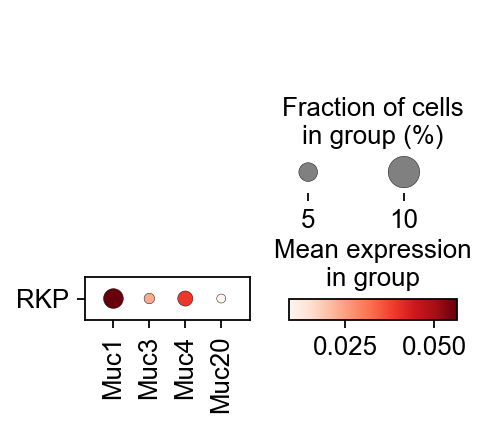

In [111]:
sc.pl.dotplot(adata_2_epi, ['Muc1',#'Muc2',
                      'Muc3','Muc4',#'Muc5ac','Muc5b', 
                            #'Muc6', 
                            #'Muc7', 
                            #'Muc8',
                            #'Muc10',
                            #'Muc11','Muc12','Muc13','Muc15',
                            #'Muc16','Muc19',
                      'Muc20',#'Muc21'
                     ], groupby='type', swap_axes=False)#, save='_Cluster_0_markers_by_tissue.pdf')

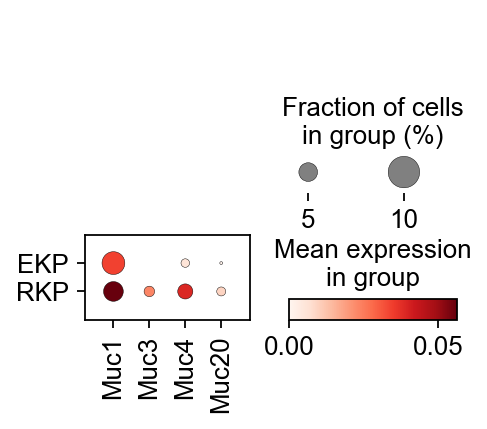

In [112]:
sc.pl.dotplot(adata_A, ['Muc1',#'Muc2',
                      'Muc3','Muc4',#'Muc5ac','Muc5b', 
                            #'Muc6', 
                            #'Muc7', 
                            #'Muc8',
                            #'Muc10',
                            #'Muc11','Muc12','Muc13','Muc15',
                            #'Muc16','Muc19',
                      'Muc20',#'Muc21'
                     ], groupby='type', swap_axes=False)#, save='_Cluster_0_markers_by_tissue.pdf')

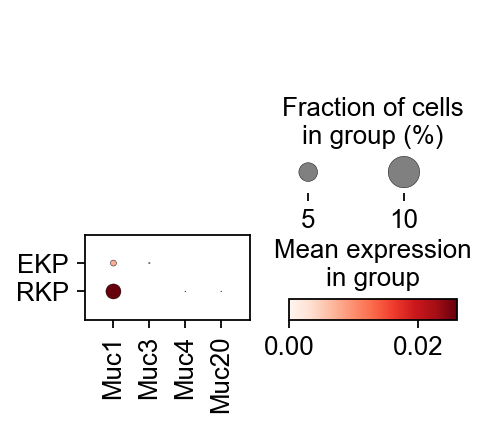

In [113]:
sc.pl.dotplot(adata_B, ['Muc1',#'Muc2',
                      'Muc3','Muc4',#'Muc5ac','Muc5b', 
                            #'Muc6', 
                            #'Muc7', 
                            #'Muc8',
                            #'Muc10',
                            #'Muc11','Muc12','Muc13','Muc15',
                            #'Muc16','Muc19',
                      'Muc20',#'Muc21'
                     ], groupby='type', swap_axes=False)#, save='_Cluster_0_markers_by_tissue.pdf')